# > The Sparks Foundation
### Data Science and Business Analytics

# > Task 1 - Prediction Using Supervised ML
### Predict the percentage of an student based on the no. of study hours.

## > Author: Ashutosh Kumar Jha

In [3]:
#importing required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

### > Reading the data

In [4]:
Data= pd.read_csv("http://bit.ly/w-data")
Data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
# To check presence of null values.
Data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


### There is no null values so no need to perform data cleaning.
## > Visualization of data 

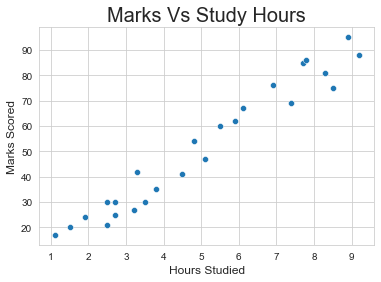

In [6]:
sns.set_style("whitegrid")
sns.scatterplot(x="Hours",y="Scores",data=Data)
plt.title("Marks Vs Study Hours",size=20)
plt.xlabel("Hours Studied",size=12)
plt.ylabel("Marks Scored",size=12)
plt.show()

### From the above graph we can observe there is presence of correlation between the marks scored by the students and Hours studied by the students to identify the correlation we will plot a Regression Line in the above graph.

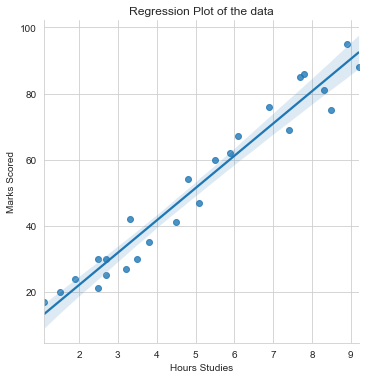

In [7]:
sns.lmplot(x="Hours",y="Scores",data=Data)
plt.title("Regression Plot of the data")
plt.xlabel("Hours Studies")
plt.ylabel("Marks Scored")
plt.show()

### > Correlation between the Hours Studied by the Student and Marks Scored by the Student.

In [8]:
Data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# > Training the Model. 

### 1. Splitting Data

In [9]:
# Defining x and y values from the data
x=Data.iloc[:,:-1].values
y=Data.iloc[:,1].values

In [10]:
# Splitting into training_dataset and testing_dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

### 2. Fitting the data in Model.

In [11]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)
print("Model Training Completed")

Model Training Completed


In [15]:
prediction_y=regressor.predict(x_test)
prediction=pd.DataFrame({'Hours': [i[0] for i in x_test], 'Predicted Marks': [k for k in prediction_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


## > Comparing the predicted Marks with the Actual Marks

In [16]:
compare_scores= pd.DataFrame({'Actual Marks':y_test,'Predicted Marks': prediction_y })
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


## >Visualizing the predicted score and Actual score 

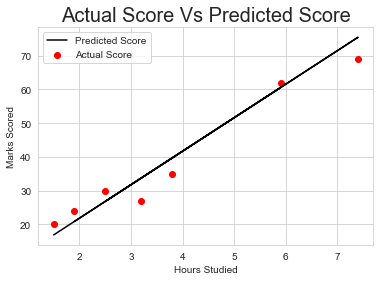

In [18]:
plt.scatter(x=x_test,y=y_test,color="red",label="Actual Score")
plt.plot(x_test,prediction_y,color="black",label="Predicted Score")
plt.title("Actual Score Vs Predicted Score",size=20)
plt.xlabel("Hours Studied")
plt.ylabel("Marks Scored")
plt.legend(loc="upper left")
plt.show()

## > Accuracy of the Model

In [19]:
error=mean_absolute_error(y_test,prediction_y)
accuracy=100-error
print("error in the model = ",error)
print("Accuracy in the model = ",accuracy)

error in the model =  4.130879918502486
Accuracy in the model =  95.86912008149751


## The mean absolute error is 4% ,if the mean absolute error is < 10% - Then Model is good to forecast the data. 

## > What will be predicted score if a student studies for 9.25 hrs/ day?

In [24]:
hours = [[9.25]] 
answer = regressor.predict(hours)  
print("Number of hours = {}".format(hours))  
print("Prediction Score = {}".format(round(answer[0],3)))

Number of hours = [[9.25]]
Prediction Score = 93.893


# > Conclusion :

## If a student studies for 9.25 hrs/day.
## He/She is likely to score 93.89 marks.

## > THANK YOU